# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Alya Saphira
- **Email:** alya.22060@mhs.unesa.ac.id
- **ID Dicoding:** alya_saphira__P4mD

## Menentukan Pertanyaan Bisnis

- Bagaaimana hubungan hari libur dengan kenaikan atau penurunan rata-rata Penyewaan?
- Bagaimana hubungan musim, temperature, dan cuaca dengan penyewaan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap Gathering Data, kita mengumpulkan data yang telah dikumpulkan. Lalu saya mengambil **Bike Sharing Dataset**. Disini saya memilih salah satu data dan mengimpor yaitu `day.csv`

### Load Label day

In [3]:
url='https://raw.githubusercontent.com/alysaphiraa/bike-sharing-dataset/refs/heads/main/day.csv'
day_df = pd.read_csv(url, encoding='unicode_escape')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
 - menampilkan 5 baris pertama dari DataFrame `day_df` seperti pada gambar.




### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Dapat disimpulkan tabel day_df tidak ada missing values, yang berarti aman.

In [6]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- memeriksa tipe data data dari tiap kolom yang terdapat dalam `day_df` menggunakan `info()`. terdapat 1 tipe data berdasarkan kolomnya tidak sesuai. Data yang perlu diperbaiki adalah: **dteday** menjadi **datetime**
- memeriksa dengan menggunakan `method describe()` parameter statistik dari kolom numerik yang terdapat dalam `day_df`.


### Cleaning Data

In [21]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count,season_labels,actual_temp,weather_labels
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Springer,14.110847,Mist
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Springer,14.902598,Mist
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Springer,8.050924,Clear
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Springer,8.200000,Clear
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Springer,9.305237,Clear


In [27]:
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    })

In [10]:
season_labels = {
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'

}
day_df['season_labels'] = day_df['season'].map(season_labels)

In [13]:
weather_labels = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain',
    4: 'Heavy Rain'
}

day_df['weather_labels'] = day_df['weathersit'].map(weather_labels)

In [28]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_labels'] = day_df.weather_labels.astype('category')

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count,season_labels,actual_temp,weather_labels
0,1,2011-01-01,1,0,Jan,0,NaN,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Springer,14.110847,Mist
1,2,2011-01-02,1,0,Jan,0,NaN,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Springer,14.902598,Mist
2,3,2011-01-03,1,0,Jan,0,NaN,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Springer,8.050924,Clear
3,4,2011-01-04,1,0,Jan,0,NaN,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Springer,8.200000,Clear
4,5,2011-01-05,1,0,Jan,0,NaN,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Springer,9.305237,Clear


In [7]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column]=pd.to_datetime(day_df[column])

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- mengganti tipe data kolom `dtday` menjadi `datetime`

## Exploratory Data Analysis (EDA)

### Eksplorasi Data day_df

In [9]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [11]:
day_df.groupby(by="season_labels").agg({
    "dteday": "nunique",
    "mnth": ["max", "min", "mean", "std"]
})

dteday mnth                         
              nunique  max min       mean       std
season_labels                                      
Fall              188    9   6   7.691489  0.948137
Springer          181   12   1   3.093923  3.403759
Summer            184    6   3   4.652174  0.951671
Winter            178   12   9  10.696629  0.919402

In [12]:
day_df["actual_temp"] = day_df["temp"]*41
day_df.groupby(by="season_labels").agg({
    "cnt": "sum",
    "actual_temp": ["max", "min", "mean", "std"]
})

cnt actual_temp                                
                   sum         max        min       mean       std
season_labels                                                     
Fall           1061129   35.328347  19.235847  28.958682  2.904749
Springer        471348   23.472500   2.424346  12.207650  4.212136
Summer          918589   33.141653  10.374763  22.320611  5.028649
Winter          841613   26.957500   9.054153  17.339148  4.421179

In [14]:
day_df.groupby('weather_labels')['cnt'].mean().reset_index().sort_values("cnt")

,weather_labels,cnt
1,Light Rain,1803.285714
2,Mist,4035.862348
0,Clear,4876.786177


In [22]:
day_df.groupby('holiday')['count'].mean().reset_index().sort_values("count")

,holiday,count
1,1,3735.000000
0,0,4527.104225


In [29]:
#Kelompokkan penyewa sepeda berdasarkan bulan
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-29-e7b8575dff60>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Jan    4521   431  2176.338710  134933
Feb    5062  1005  2655.298246  151352
Mar    8362   605  3692.258065  228920
Apr    7460   795  4484.900000  269094
May    8294  2633  5349.774194  331686
Jun    8120  3767  5772.366667  346342
Jul    8173  3285  5563.677419  344948
Aug    7865  1115  5664.419355  351194
Sep    8714  1842  5766.516667  345991
Oct    8156    22  5199.225806  322352
Nov    6852  1495  4247.183333  254831
Dec    6606   441  3403.806452  211036

In [16]:
day_df.registered.sum()

2672662

**Insight:**
- Menuliskan dataset characters pada `season` dan `weather`
- Menemukan hubungan antara `temp` dengan `season`

## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Bagaimana hubungan hari libur dengan rata-rata penyewaan?
- Bagaimana hubungan musim, temperatur, dan cuaca dengan penyewaan?

<ipython-input-17-6c0d18669523>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='cnt', data=avg_holiday, palette='bright')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


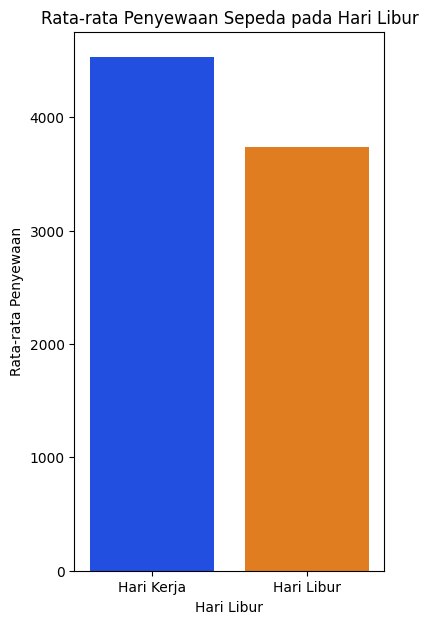

In [17]:
avg_holiday = day_df.groupby('holiday')['cnt'].mean().reset_index().sort_values("cnt")

plt.figure(figsize=(4, 7))
sns.barplot(x='holiday', y='cnt', data=avg_holiday, palette='bright')

plt.title('Rata-rata Penyewaan Sepeda pada Hari Libur')
plt.xlabel('Hari Libur')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks([0, 1], ['Hari Kerja', 'Hari Libur'])

plt.show()

### Pertanyaan 2:

<ipython-input-19-d83053f7f04c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

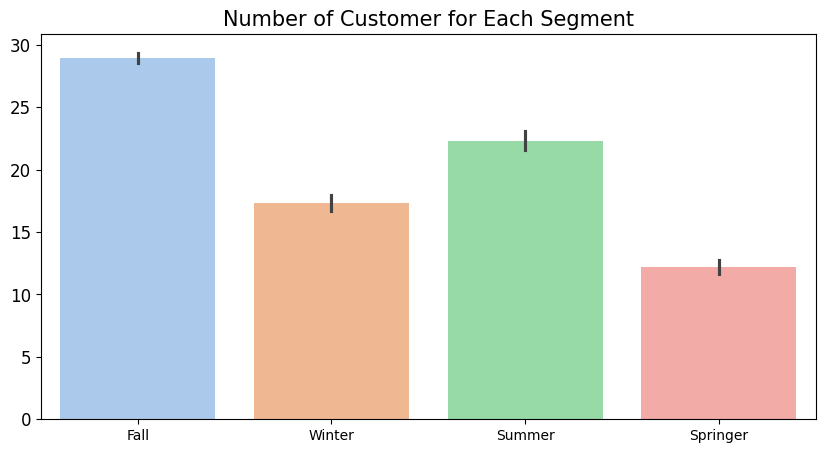

In [19]:

plt.figure(figsize=(10, 5))

sns.barplot(
    x="season_labels",
    y="actual_temp",
    data=day_df.sort_values(by="cnt", ascending=False),
    palette='pastel'
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

<ipython-input-35-4c70f5a1c95a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()


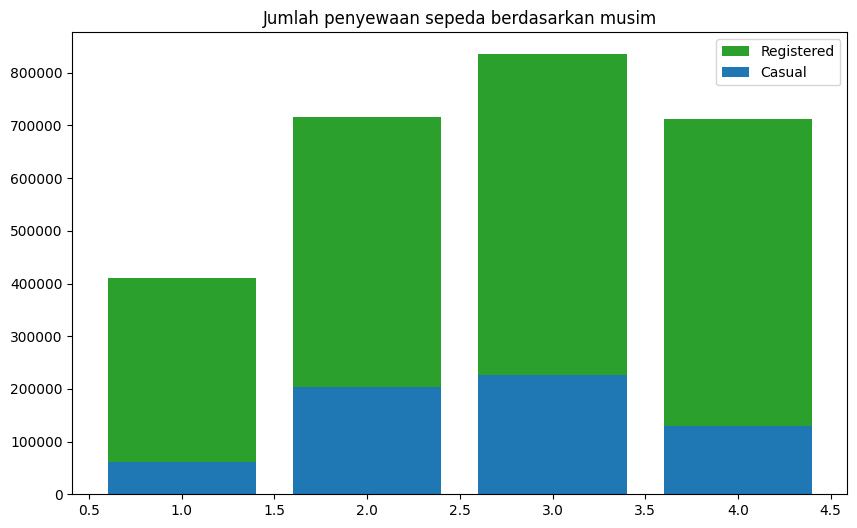

In [35]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:green'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:blue'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

**Insight:**
- Terlihat dari pertanyaan 1, ternyata penyewaan sepeda saat hari kerja memiliki rata-rata paling tinggi dibanding dengan hari libur.
- Dari pertanyaan 2 didapatkan hasil dimana `Season` Fall memiliki rata-rata paling tinggi sebaliknya, `season` Spring mendapatkan rata-rata paling rendah. Dikarenakan adanya hubungan dengan  temperature.

## Conclusion

- Conclution pertanyaan 1
  *  Rata - rata penyewaan terjadi saat hari kerja yaitu Senin sampai Jumat, kemungkinan kebutuhan orang-orang untuk beraktivitas sehari-hari misalnya bersekolah, bekerja atau aktivitas lainnya. Penggunaan sepeda dapat menjadi pilihan yang tepat untuk melakukan kegiatan sehari-hari dengan rute pendek.

- Conclution pertanyaan 2

  *   Hubungan Antara Season dengan Temperature
      Terlihat pada plot yang sudah dibuat di atas, Telihat bahwa Temperature yang baik adalah saat Season Fall memiliki rata-rata penyewaan yang paling tinggi. Sehingga minat untuk bersepeda melakukan aktivitas dengan baik sangat tinggi.
  *   Cuaca yang baik memungkinkan untuk bersepeda karena memilikiudara yang sejuk dan rileks. Penyewaan sepeda saat cuaca cerah merupakan hal yang tepat untuk melakukan aktivitas.
  *   Dalam visualisasi terakhir, hasil yang diperoleh menunjukkan bahwa musim dingin (Winter) tidak menempati posisi terakhir; melainkan, yang terakhir adalah musim semi (Spring). Hal ini mungkin dipengaruhi oleh berbagai faktor, seperti kondisi cuaca, suhu udara, hari kerja, hari libur, dan lainnya. Di sisi lain, musim gugur (Fall) menempati urutan teratas dengan total penyewaan sepeda mencapai lebih dari 800.000.



In [37]:
day_df.to_csv("main_data.csv", index=False)